Швидкий погляд на дані:
1. Завантажте набір даних.
2. Виведіть заголовок таблиці (перші 5 записів).
3. Скільки рядків і стовпців в таблиці?
4. Які назви стовпців?
5. Які типи даних у різних стовпців?
6. Скільки в кожному з них унікальних значень?
7. Скільки пропущених значень?

Варіант 5
Набір даних: продажі відеоігор (vgsales.csv).
Аналіз даних:
1. Знайдіть ТОП-10 ігор за кількістю продажів на платформі PC за всі
роки (1980-2020).
2. Побудуйте графік продажів гри Super Mario Bros. в Європі за роками.
3. Визначте, ігри якого жанру найчастіше продавались в Північній
Америці у 2010 році. Підрахуйте сумарну кількість проданих ігор
цього жанру.
4. Побудуйте кругову діаграму, яка відображає долю проданих ігор 5
найпопулярніших видавництв (Publisher) по відношенню до
загальної кількості проданих ігор за останні 10 років.
5. Визначте середню кількість всіх проданих ігор у світі за кожні 5
років, починаючи з 1980. Побудуйте графік hist.

In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read file
file = pd.read_csv('data.csv')    

In [3]:
# Print first 5 rows
print(file[:5])

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [4]:
# Count rows and columns
size = file.shape
print(f'Rows: {size[0]} , Columns: {size[1]}')

Rows: 16598 , Columns: 11


In [5]:
# Print name columns
print(', '.join(list(file.columns)))

Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales


In [6]:
# Print datatypes columns
print(file.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [7]:
# Print count unique values in columns
print(file.apply(lambda col: len(col.unique())))

Rank            16598
Name            11493
Platform           31
Year               40
Genre              12
Publisher         579
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64


In [8]:
# Print count empty values in columns
print(file.apply(lambda col: np.count_nonzero(col.isnull())))

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [9]:
# Print top 10 games for PC 
top_10_games = file.loc[file['Platform']=='PC'].nlargest(10, 'Global_Sales')
print(top_10_games[['Name', 'Platform', 'Global_Sales']])

                                       Name Platform  Global_Sales
83                               The Sims 3       PC          8.11
137                       World of Warcraft       PC          6.28
181                              Diablo III       PC          5.20
194              Microsoft Flight Simulator       PC          5.12
217          StarCraft II: Wings of Liberty       PC          4.83
267          Warcraft II: Tides of Darkness       PC          4.21
281                               Half-Life       PC          4.12
288  World of Warcraft: The Burning Crusade       PC          4.09
310             The Elder Scrolls V: Skyrim       PC          3.88
328                     The Sims: Unleashed       PC          3.76


                  Name  EU_Sales    Year
1    Super Mario Bros.      3.58  1985.0
200  Super Mario Bros.      1.30  1999.0


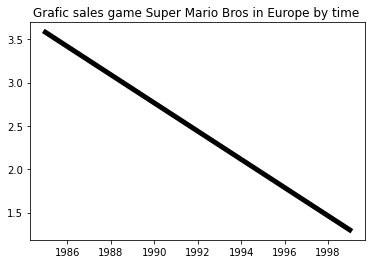

In [10]:
# Plot grafic sales game Super Mario Bros in Europe by time 
mario_data = file.loc[file['Name'] == 'Super Mario Bros.']
print(mario_data[['Name', 'EU_Sales', 'Year']])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(mario_data['Year'], mario_data['EU_Sales'], color = 'black', linewidth = 5)
plt.title("Grafic sales game Super Mario Bros in Europe by time ")
plt.show()



In [11]:
# Print main popular genre in NA and count sales this genre
print(file.loc[file['Year']==2010].groupby(by="Genre").sum().nlargest(1, 'NA_Sales'))

           Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Genre                                                                  
Action  1617111  454260.0     60.32     35.75      8.58        12.85   

        Global_Sales  
Genre                 
Action        117.64  


Побудуйте кругову діаграму, яка відображає долю проданих ігор 5 найпопулярніших видавництв (Publisher) по відношенню до загальної кількості проданих ігор за останні 10 років.

(-1.102399880906558,
 1.1001142800431694,
 -1.1142305467682647,
 1.102321026722625)

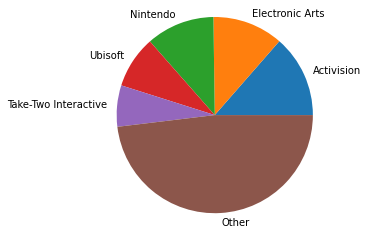

In [60]:
ex_file = file.copy()

data_last_10_years = ex_file[ex_file['Year']>2010].groupby(by="Publisher").sum()
top_5_games = data_last_10_years.nlargest(5, 'Global_Sales')
other = data_last_10_years[data_last_10_years['Global_Sales']<=(top_5_games.min())['Global_Sales']].sum()
labels = ["Activision", "Electronic Arts", "Nintendo", "Ubisoft", "Take-Two Interactive", "Other"]
fig, ax = plt.subplots()
top = top_5_games.append(other, ignore_index=True)
ax.pie(top['Global_Sales'], labels=labels)
ax.axis("equal")

5. Визначте середню кількість всіх проданих ігор у світі за кожні 5
років, починаючи з 1980. Побудуйте графік hist.

<BarContainer object of 8 artists>

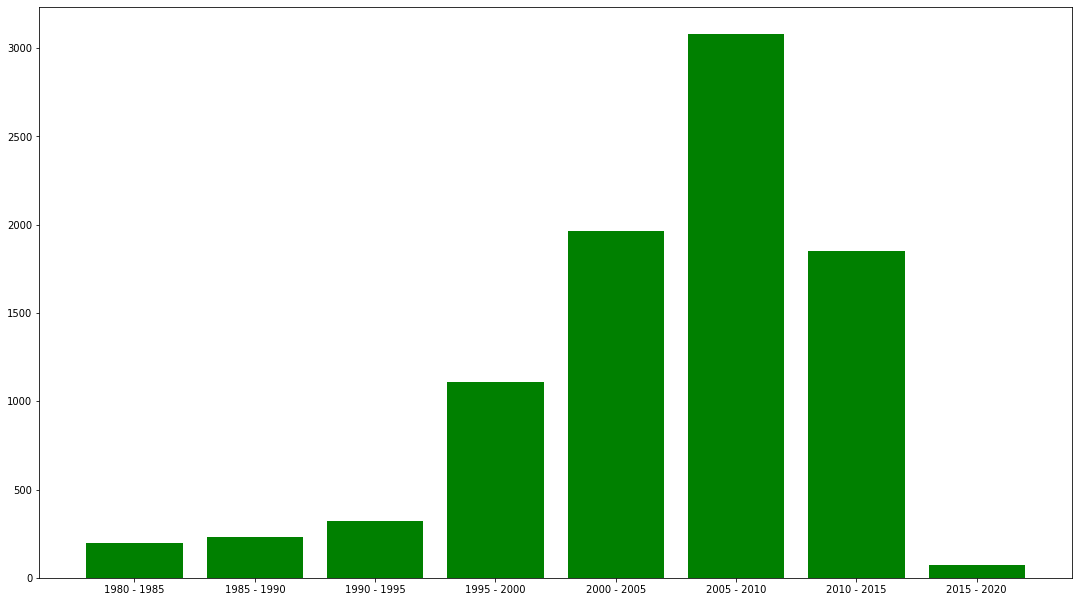

In [101]:
ex_file = file.copy()
group_by_years = ex_file.groupby(ex_file['Year']).sum()
start = 1980
global_sales = 0
year_range_global_sales_dict = {}
for group_by_year in group_by_years.iterrows():
    global_sales += group_by_year[1]['Global_Sales']
    if int(group_by_year[0]) == start + 5:
        year_range_global_sales_dict[f'{start} - {int(group_by_year[0])}'] = round(global_sales, 2) 
        global_sales = 0
        start = start + 5
        
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.bar(year_range_global_sales_dict.keys(), year_range_global_sales_dict.values(), color='g')